In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2
import tensorflow as tf

In [4]:
testCrime = os.listdir("./Videos/Test Videos/Crime - Relevant")
testNormal = os.listdir("./Videos/Test Videos/Normal - Full Video")
models = [item for item in os.listdir("./Models") if item[-3:]==".h5"]

In [5]:
def setStateNormal(pred):
    ret = None
    if pred>0.5:
        ret = "Crime"
    else:
        ret = "Normal"
        
    return f"{ret} - {round(pred*100, 4)}%"


def ShowPredictions(video:str,buffer_size:int=90):
    
    folder="Crime - Relevant"
    if video.find("Normal_Videos")!=-1:
        folder = "Normal - Full Video"
    
    buffer = []
    prev_pred = "State: NaN"
    
    color = {
        1: (255, 0, 0), # blue 
        2: (0, 255, 0), # green
        3: (0, 0, 255), # red
        4: (106, 0, 0), # dark blue
        5: (0, 97, 0),  # dark green
        6: (0, 0, 96)   # dark red
    }
    
    multiplier=1
    outSize=(320*multiplier, 240*multiplier)

    cur_color = color[2]

    cap = cv2.VideoCapture(f'./Videos/Test Videos/{folder}/{video}')

    if cap.isOpened()==False:
        print("Either file not found or wrong codec used")

    while cap.isOpened():

        ret, frame = cap.read()

        if ret==True:

            # Make a copy of your frame and resize it to pass it to model
            out = frame.copy()

            out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
            out = cv2.resize(out, (320, 240)).astype("float32")
            pred = model.predict(np.expand_dims(out, axis=0))[0][0]

            # if the buffer is not full yet, show the current frames prediction alone
            if len(buffer)<buffer_size:
                buffer.append(pred)
                state = setStateNormal(pred)
            # else show the rolling avg of the previous buffer_size frame's prediction 
            else:
                buffer.pop(0)
                buffer.append(pred)
                state = setStateNormal(sum(buffer)/buffer_size)
            prev_pred = state

            # Add the text showing the prediction to frame and display it
            frame = cv2.putText(frame, state, (0,20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, cur_color, 2)

            frame = cv2.resize(frame, outSize)
            cv2.imshow('frame',frame)

            # On pressing 'q' key quit and display the result of the last frame we encountered
            if cv2.waitKey(1) & 0xFF==ord('q'):
                print(f"Prediction at last frame:\n")
                plt.imshow(frame)
                break

        else:
            break

    cap.release()
    cv2.destroyAllWindows()

In [6]:
models

['model_31-3-21.h5']

In [7]:
# select model to use (model_nos>0)
model_nos = 1
model = tf.keras.models.load_model(f"./models/{models[model_nos-1]}")

Prediction at last frame:



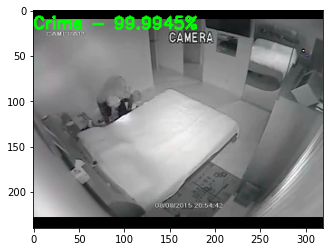

In [8]:
# select video (index >= 0 and index <= 49)
video_nos=19
videoname = testCrime[video_nos-1]
ShowPredictions(videoname)

Prediction at last frame:



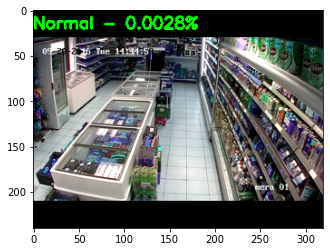

In [9]:
# select video (index >= 0 and index <= 49)
video_nos=40
videoname = testNormal[video_nos-1]

ShowPredictions(videoname)